<a href="https://colab.research.google.com/github/github-rokon/CVPR/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Generate a synthetic dataset with 5 distinct classes
X, y = make_classification(n_samples=1000, n_features=10, n_classes=5, n_informative=5, n_redundant=2, random_state=42)

# One-hot encode the labels (for multi-class classification)
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")


X_train shape: (800, 10)
y_train shape: (800, 5)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [7]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_layer_sizes, output_size, learning_rate=0.01):
        # Initialize network parameters (weights and biases)
        self.learning_rate = learning_rate
        self.weights = [
            np.random.randn(input_size, hidden_layer_sizes[0]),
            np.random.randn(hidden_layer_sizes[0], hidden_layer_sizes[1]),
            np.random.randn(hidden_layer_sizes[1], hidden_layer_sizes[2]),
            np.random.randn(hidden_layer_sizes[2], output_size)
        ]
        self.biases = [
            np.zeros((1, hidden_layer_sizes[0])),
            np.zeros((1, hidden_layer_sizes[1])),
            np.zeros((1, hidden_layer_sizes[2])),
            np.zeros((1, output_size))
        ]

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def relu(self, z):
        return np.maximum(0, z)

    def relu_derivative(self, z):
        return np.where(z > 0, 1, 0)

    def categorical_crossentropy(self, y_true, y_pred):
        return -np.mean(np.sum(y_true * np.log(y_pred + 1e-9), axis=1))

    def forward(self, X):
        # Forward propagation
        self.z1 = np.dot(X, self.weights[0]) + self.biases[0]
        self.a1 = self.relu(self.z1)

        self.z2 = np.dot(self.a1, self.weights[1]) + self.biases[1]
        self.a2 = self.relu(self.z2)

        self.z3 = np.dot(self.a2, self.weights[2]) + self.biases[2]
        self.a3 = self.relu(self.z3)

        self.z_out = np.dot(self.a3, self.weights[3]) + self.biases[3]
        self.a_out = self.softmax(self.z_out)

        return self.a_out

    def backward(self, X, y_true):
        # Backward propagation
        m = y_true.shape[0]

        # Output layer error
        d_z_out = self.a_out - y_true
        d_w_out = np.dot(self.a3.T, d_z_out) / m
        d_b_out = np.sum(d_z_out, axis=0, keepdims=True) / m

        # Hidden layer 3 error
        d_a3 = np.dot(d_z_out, self.weights[3].T)
        d_z3 = d_a3 * self.relu_derivative(self.z3)
        d_w3 = np.dot(self.a2.T, d_z3) / m
        d_b3 = np.sum(d_z3, axis=0, keepdims=True) / m

        # Hidden layer 2 error
        d_a2 = np.dot(d_z3, self.weights[2].T)
        d_z2 = d_a2 * self.relu_derivative(self.z2)
        d_w2 = np.dot(self.a1.T, d_z2) / m
        d_b2 = np.sum(d_z2, axis=0, keepdims=True) / m

        # Hidden layer 1 error
        d_a1 = np.dot(d_z2, self.weights[1].T)
        d_z1 = d_a1 * self.relu_derivative(self.z1)
        d_w1 = np.dot(X.T, d_z1) / m
        d_b1 = np.sum(d_z1, axis=0, keepdims=True) / m

        # Update weights and biases
        self.weights[3] -= self.learning_rate * d_w_out
        self.biases[3] -= self.learning_rate * d_b_out
        self.weights[2] -= self.learning_rate * d_w3
        self.biases[2] -= self.learning_rate * d_b3
        self.weights[1] -= self.learning_rate * d_w2
        self.biases[1] -= self.learning_rate * d_b2
        self.weights[0] -= self.learning_rate * d_w1
        self.biases[0] -= self.learning_rate * d_b1

    def train(self, X_train, y_train, epochs=100):
        for epoch in range(epochs):
            y_pred = self.forward(X_train)
            loss = self.categorical_crossentropy(y_train, y_pred)
            self.backward(X_train, y_train)
            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")

    def predict(self, X):
        y_pred = self.forward(X)
        return np.argmax(y_pred, axis=1)


In [8]:
# Initialize the neural network
input_size = X_train.shape[1]
hidden_layer_sizes = [64, 128, 64]  # Three hidden layers
output_size = y_train.shape[1]  # 5 output classes
learning_rate = 0.01

nn = NeuralNetwork(input_size, hidden_layer_sizes, output_size, learning_rate)

# Train the neural network
nn.train(X_train, y_train, epochs=100)


Epoch 0, Loss: 16.032313168237543
Epoch 10, Loss: 6.4085413480209334
Epoch 20, Loss: 4.2688629937227685
Epoch 30, Loss: 3.2920003422070714
Epoch 40, Loss: 2.608651437726227
Epoch 50, Loss: 2.2287423936186763
Epoch 60, Loss: 1.8596940133508952
Epoch 70, Loss: 1.5684409606495515
Epoch 80, Loss: 1.367836648437218
Epoch 90, Loss: 1.222131272083392


In [9]:
# Evaluate the model on test data
y_pred = nn.predict(X_test)

# Convert one-hot encoded y_test back to class labels
y_test_labels = np.argmax(y_test, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_test_labels, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test_labels, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_labels, y_pred))


Accuracy: 55.50%
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.70      0.53        44
           1       0.69      0.63      0.66        43
           2       0.67      0.34      0.45        41
           3       0.56      0.50      0.53        38
           4       0.59      0.59      0.59        34

    accuracy                           0.56       200
   macro avg       0.59      0.55      0.55       200
weighted avg       0.59      0.56      0.55       200

Confusion Matrix:
 [[31  4  2  5  2]
 [ 7 27  3  1  5]
 [16  3 14  4  4]
 [13  2  1 19  3]
 [ 5  3  1  5 20]]


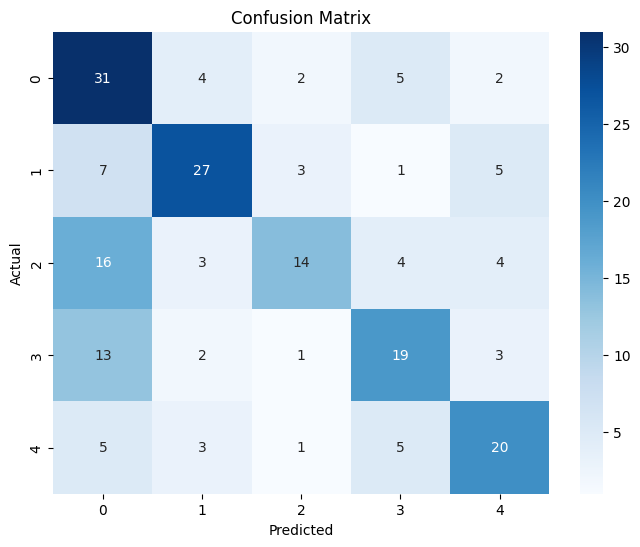

In [10]:
import seaborn as sns

# Plot confusion matrix
cm = confusion_matrix(y_test_labels, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(5), yticklabels=range(5))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
